## Naloga

Napiši **rekurzivno funkcijo** `izpuscaji(s)`, ki prejme seznam števil, na primer, `[3, 1, 2, 4, 0, 1, 2, 2, 3]` in simulira, kar kaže slika.

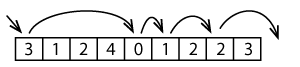

Vsaka številka pove, koliko naslednjih celic je potrebno preskočiti. Funkcija vrne zaporedje števil v obiskanih poljih. V gornjem primeru vrne `[3, 0, 1, 2]`.

Povedano drugače, funkcija mora narediti tole:

```python
def izpuscaji(s):
    i = 0
    r = []
    while i < len(s):
        r.append(s[i])
        i += s[i] + 1
    return r
```

Le da mora vaša funkcija to naredi z rekurzijo, ne z zanko. Ne pišite nerekurzivne funkcije, saj sem jo že jaz.

## Neobvezni izziv za vse, ki jih gornje dolgočasi

Napiši **rekurzivno** funkcijo `nazaj(s)`, ki prejme nek neprazen seznam števil in vrne naraščajoči seznam, ki se konča z istim elementom, ostale elemente pa pobere tako, da jih izbira od desne proti levi, a tako, da nikoli ne doda elementa, ki bi bil večji od naslednjega.

Ta opis je bil čuden. Lažje bo s primerom.

Vzemimo `[7, 5, 8, 10, 16, 12, 23, 18, 30]`. Novi seznam se bo končal z `[30]`. Nato gremo proti levi. Pred 30 smemo dodati 18, torej imamo `[18, 30]`. Naslednje število je 23, vendar ga ne smemo dodati, ker `[23, 18, 30]` ne bi bil naraščajoč seznam (23 je večje od 18). 23 torej preskočimo in ostanemo pri `[18, 30]`. Nato je na vrsti 12. To lahko dodamo in imamo `[12, 18, 30]`. 16 moramo preskočiti, ker je večje od 12. 10 lahko dodamo in imamo `[10, 12, 18, 30]`. Prav tako smemo dodati 10, 8 in 5, preskočimo pa 7. Rezultat je torej `[5, 8, 10, 12, 18, 30]`.

Funkcija je bistveno preprostejša od opisa.

## Neobvezni izziv 2

Obvezno funkcijo, `izouscaji`, napiši v eni vrstici - a še vedno rekurzivno.

(Ne, ne, ne gre za izpeljane sezname. Samo to, kar si naredil(a) v obvezni nalogi malo preoblikuj. Če ne znaš, a bi rad(a) naredila, mi piši za nasvet.)

# Rešitev

In [1]:
def izpuscaji(s):
    if not s:
        return []
    prvi = s[0]
    return [prvi] + izpuscaji(s[1 + prvi:])

Če je seznam prazen, vrnemo prazen seznam. Sicer je `prvi` prvi element. Vrniti moramo seznam, ki vsebuje ta element in seznam, ki ga dobimo tako, da izpustimo ta element (`1`) in toliko elementov, kolikor je `prvi`, ter v tem (torej v `s[1 + prvi:]`) ponovimo tole izpuščanje.

In [2]:
izpuscaji([3, 1, 2, 4, 0, 1, 2, 2, 3])

[3, 0, 1, 2]

Če hočemo to narediti z enim samim izrazom, pa gre najlepše s pythonovskim trikom:

In [3]:
def izpuscaji(s):
    return s and [s[0]] + izpuscaji(s[s[0] + 1:])

In [4]:
izpuscaji([3, 1, 2, 4, 0, 1, 2, 2, 3])

[3, 0, 1, 2]

Če je `s` prazen, je neresničen; `s and ...` zato vrne `s`. Če je prazen, pa je resničen in funkcija vrne, kar sledi operatorju `and`.

## Nazaj

In [5]:
def nazaj(s):
    if len(s) == 1:
        return s
    ostali = nazaj(s[1:])
    if s[0] < ostali[0]:
        return [s[0]] + ostali
    return ostali

Če ima seznam le ene element, ga vrnemo. Sicer naj bodo `ostali` tisto, kar vrne `nazaj` na ostanku seznama. Če je prvi element manjši od prvega elementa tega seznama, ga smemo dodati - vrnemo torej vsoto seznama, ki vsebuje ta, prvi element, in vse ostale. Sicer pa ga ne dodamo, temveč vrnemo le ostale.